In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
import warnings
from sklearn import datasets, metrics
%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
import chardet
with open('/content/Book6.csv' , 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7261269295874283, 'encoding': 'ISO-8859-1', 'language': ''}

In [14]:
df = pd.read_csv('/content/Book6.csv',encoding='ISO-8859-1')
df.head()

,id,label,tweet
0,1,1,The first one is the best Rashid khan #AFGHANI...
1,2,1,East or west king Baber is Best #PAKISTAN
2,3,1,Best delivery was Adil Rashid bowled #AFGHANISTAN
3,4,1,King of the Googley Rashid Khan From #PAKISTAN
4,5,1,What a Ball by Rashid khan to Babar oh my favo...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      499 non-null    int64 
 1   label   499 non-null    int64 
 2   tweet   499 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.8+ KB


In [16]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [17]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [18]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,1,The first one is the best Rashid khan #AFGHANI...,The first one is the best Rashid khan #AFGHANI...
1,2,1,East or west king Baber is Best #PAKISTAN,East or west king Baber is Best #PAKISTAN
2,3,1,Best delivery was Adil Rashid bowled #AFGHANISTAN,Best delivery was Adil Rashid bowled #AFGHANISTAN
3,4,1,King of the Googley Rashid Khan From #PAKISTAN,King of the Googley Rashid Khan From #PAKISTAN
4,5,1,What a Ball by Rashid khan to Babar oh my favo...,What a Ball by Rashid khan to Babar oh my favo...


In [19]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,1,The first one is the best Rashid khan #AFGHANI...,first best Rashid khan #AFGHANISTAN
1,2,1,East or west king Baber is Best #PAKISTAN,East west king Baber Best #PAKISTAN
2,3,1,Best delivery was Adil Rashid bowled #AFGHANISTAN,Best delivery Adil Rashid bowled #AFGHANISTAN
3,4,1,King of the Googley Rashid Khan From #PAKISTAN,King Googley Rashid Khan From #PAKISTAN
4,5,1,What a Ball by Rashid khan to Babar oh my favo...,What Ball Rashid khan Babar favourite Rashid k...


In [20]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0            [first, best, Rashid, khan, #AFGHANISTAN]
1           [East, west, king, Baber, Best, #PAKISTAN]
2    [Best, delivery, Adil, Rashid, bowled, #AFGHAN...
3       [King, Googley, Rashid, Khan, From, #PAKISTAN]
4    [What, Ball, Rashid, khan, Babar, favourite, R...
Name: clean_tweet, dtype: object

In [21]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0            [first, best, rashid, khan, #afghanistan]
1           [east, west, king, baber, best, #pakistan]
2    [best, deliveri, adil, rashid, bowl, #afghanis...
3       [king, googley, rashid, khan, from, #pakistan]
4    [what, ball, rashid, khan, babar, favourit, ra...
Name: clean_tweet, dtype: object

In [22]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,1,The first one is the best Rashid khan #AFGHANI...,first best rashid khan #afghanistan
1,2,1,East or west king Baber is Best #PAKISTAN,east west king baber best #pakistan
2,3,1,Best delivery was Adil Rashid bowled #AFGHANISTAN,best deliveri adil rashid bowl #afghanistan
3,4,1,King of the Googley Rashid Khan From #PAKISTAN,king googley rashid khan from #pakistan
4,5,1,What a Ball by Rashid khan to Babar oh my favo...,what ball rashid khan babar favourit rashid kh...


In [23]:
pip install wordcloud

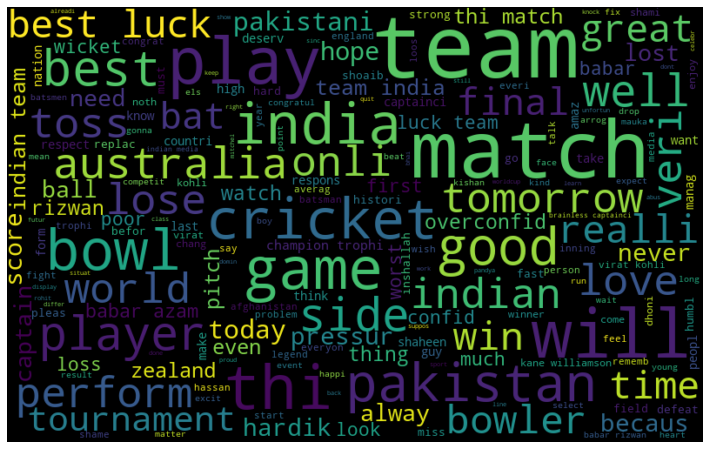

In [24]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

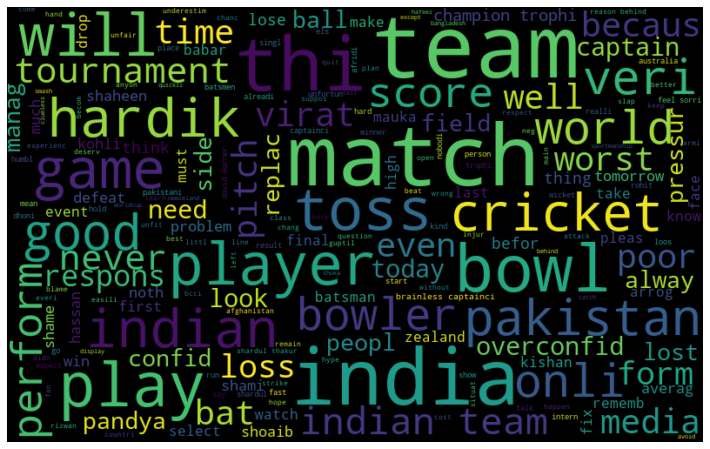

In [25]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

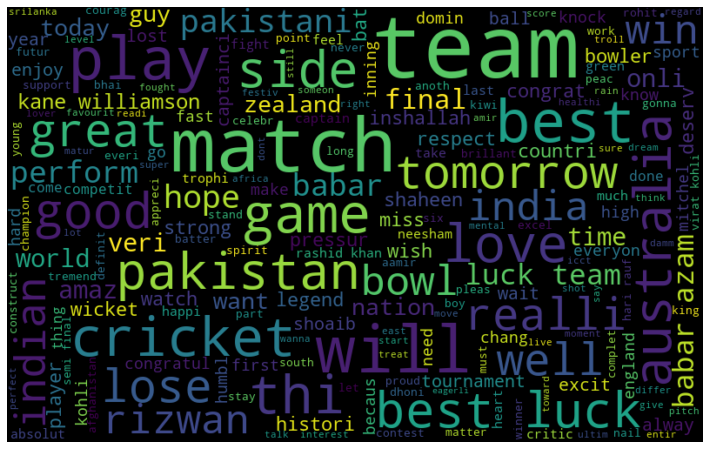

In [26]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [28]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==1])

ht_negative = hashtag_extract(df['clean_tweet'][df['label']==0])

In [29]:
ht_positive[:5]

[['afghanistan'], ['pakistan'], ['afghanistan'], ['pakistan'], ['afghanistan']]

In [30]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [31]:
ht_positive[:5]

['afghanistan', 'pakistan', 'afghanistan', 'pakistan', 'afghanistan']

In [32]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,afghanistan,3
1,pakistan,10
2,icct,2
3,australia,8
4,srilanka,1


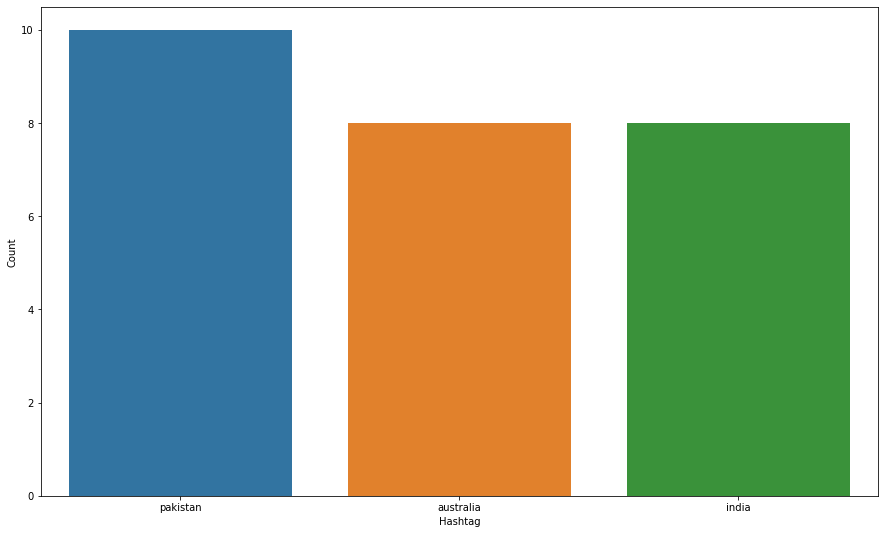

In [33]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=3)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [34]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,india,6
1,pakistan,5
2,afghanistan,2
3,australia,2
4,newzeland,1


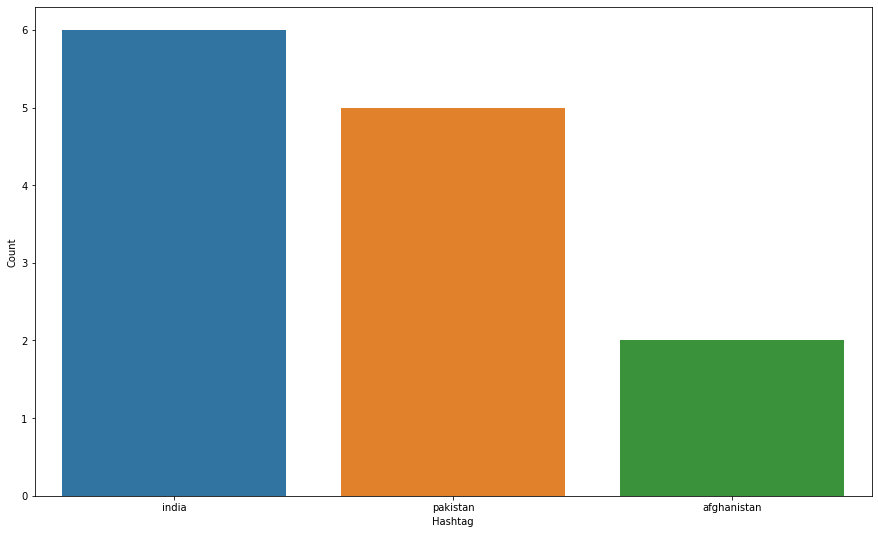

In [35]:
d = d.nlargest(columns='Count', n=3)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42,)

In [39]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
#from sklearn import svm
#model = svm.SVC(kernel='sigmoid')
#model = RandomForestClassifier(n_estimators=100, random_state = 42)
model = DecisionTreeClassifier(criterion="entropy",random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [40]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.6714285714285715

In [41]:
accuracy_score(y_test,pred)

0.632

In [42]:
mat = metrics.confusion_matrix(y_test, pred)

In [43]:
class_names = [0,1]

Text(33.0, 0.5, 'True')

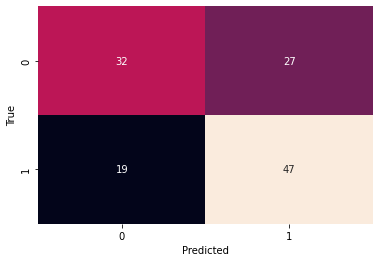

In [44]:
sns.heatmap(mat, annot=True, fmt = 'd', cbar = False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')

In [45]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58        59
           1       0.64      0.71      0.67        66

    accuracy                           0.63       125
   macro avg       0.63      0.63      0.63       125
weighted avg       0.63      0.63      0.63       125

